# OBJECTIVE:
 ### 1.APPLY DBSCAN  CLUSTERING ON FINE FOOD REVIEWS DATASET 
 
### 2.FORMING CLUSTERS WITH AVG WORD2VEC VECTORIZATION
 
### 3 FINDING THE BEST EPS VALUES WITH ELBOW_KNEE METHOD
 
### 4  GETTING THE WORDS IN THE CLUSTER AND REPRESENTING EACH CLUSTER WORDS
 
 
  

In [8]:
from sklearn.model_selection import train_test_split  #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from gensim.models import Word2Vec
from tqdm import tqdm


In [2]:
final_processed_data=pd.read_csv("C:/Users/Mayank/Desktop/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [3]:
data=final_processed_data.sample(6000)# taking sample data

In [4]:
print("shape of our new data is ",data.shape)#printing the shape
print("data is as follows:")
print(data.head())#printing 

shape of our new data is  (6000, 2)
data is as follows:
       Score                                        CleanedText
24645      1  savori choic concentr excel make homemad broth...
83326      1  bought chip littl sandwich shop sonoma vacat w...
29012      1  plocki tortilla chip red bean rice ounc bag pa...
51594      1     mix pleasant color flavor great dish call rice
54396      1  brother gave christma favorit gift becam confi...


In [5]:
list_of_sent=[]
for sent in data['CleanedText'] :
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=50,size=100,workers=3)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")
print("sample words ", w_t_c_words[0:50])

['savori', 'choic', 'concentr', 'excel', 'make', 'homemad', 'broth', 'ingredi', 'product', 'everi', 'bit', 'good', 'mine']
***********************************************************************
sample words  ['choic', 'excel', 'make', 'homemad', 'ingredi', 'product', 'everi', 'bit', 'good', 'mine', 'bought', 'chip', 'littl', 'shop', 'wasnt', 'sure', 'expect', 'packag', 'first', 'bite', 'didnt', 'know', 'think', 'flavor', 'hit', 'yum', 'spici', 'noth', 'lot', 'crunchi', 'sweet', 'arent', 'sold', 'though', 'still', 'tri', 'find', 'close', 'live', 'red', 'bean', 'rice', 'ounc', 'bag', 'pack', 'tast', 'visit', 'avail', 'order', 'amazon']


In [6]:
###### NOW STARTING AVERAGE WORD TO VEC FOR TRAIN DATA#################################################################
train_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
 sent_vec = np.zeros(100) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     sent_vec += vec
     cnt_words += 1
 if cnt_words != 0:
  sent_vec /= cnt_words
 train_sent_vectors.append(sent_vec)
print(len(train_sent_vectors))
print(len(train_sent_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:05<00:00, 1016.03it/s]


6000
100


In [9]:
from sklearn.preprocessing import StandardScaler #standarizing the training data
x_data=StandardScaler( with_mean=False).fit_transform(train_sent_vectors)
print(x_data.shape)

(6000, 100)


# ELBOW METHOD TO FIND BEST VALUE OF EPS

In [10]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=100)
neigh.fit(x_data)
dist,ind= neigh.kneighbors(x_data)
listed_dis=[]
listed_dis =dist[: ,99].tolist()
listed_dis.sort()

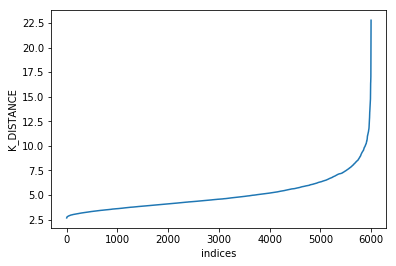

In [11]:
import matplotlib.pyplot as plt
plt.plot( np.arange(0,len(listed_dis)),listed_dis)
plt.ylabel('K_DISTANCE')
plt.xlabel('indices')
plt.show()

# BEST EPS FROM ABOVE GRAPH IS 6

In [14]:
# #############################################################################
# Compute DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=6, min_samples=100).fit(x_data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.

In [21]:
# here appending a new column clusters in our dataset to get cluster 
data['Cluster'] = labels
print(data.head())


       Score                                        CleanedText  Cluster
24645      1  savori choic concentr excel make homemad broth...        0
83326      1  bought chip littl sandwich shop sonoma vacat w...        0
29012      1  plocki tortilla chip red bean rice ounc bag pa...        0
51594      1     mix pleasant color flavor great dish call rice        0
54396      1  brother gave christma favorit gift becam confi...        0


In [17]:
np.unique(labels)

array([-1,  0], dtype=int64)

#  HERE WE GOT TWO CLUSTERS AS -1,0

In [29]:
# here we are appending words to clusters from  word_to_vec words dictionary of words
i=0;
cluster_1=[]
cluster_2=[]
for line in list_of_sent[:5999]:
    i=i+1;
    for each_word in line:
       for word in  w_t_c_words:
          if word==each_word:
            c=data['Cluster'][i:i+1].iloc[0]
            if c==0:
                cluster_1.append(word);
            if c==-1:
                cluster_2.append(word);
            break; 
       break; 
              

In [33]:
print("WORDS IN CLUSTER 0 ARE",len(cluster_1))
print("WORDS IN CLUSTER 1 ARE",len(cluster_2))


WORDS IN CLUSTER 0 ARE 4850
WORDS IN CLUSTER 1 ARE 191


############################################################################################################
WORDS FOR CLUSTER 1 ARE:::


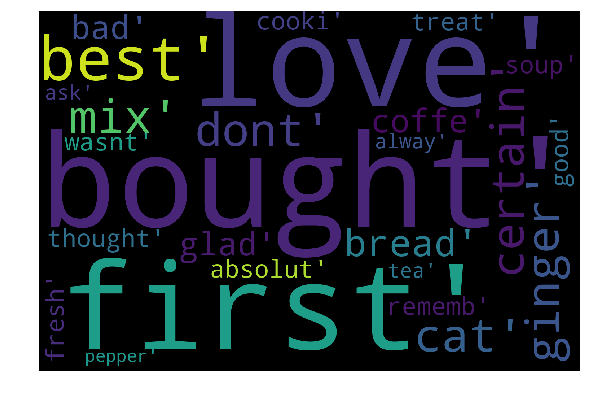

############################################################################################################


In [41]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='black', 
                 
                min_font_size = 10).generate(str(cluster_1[:30])) 
  
# plot the WordCloud image 
print("############################################################################################################")
print("WORDS FOR CLUSTER 1 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
print("############################################################################################################")


# THIS CLUSTER REPRESENT WORDS RELATED TO ITEMS FEATURES  SUCH AS FRESH,BEST,BAD

###########################################################################################################
WORDS FOR CLUSTER 2 ARE:::


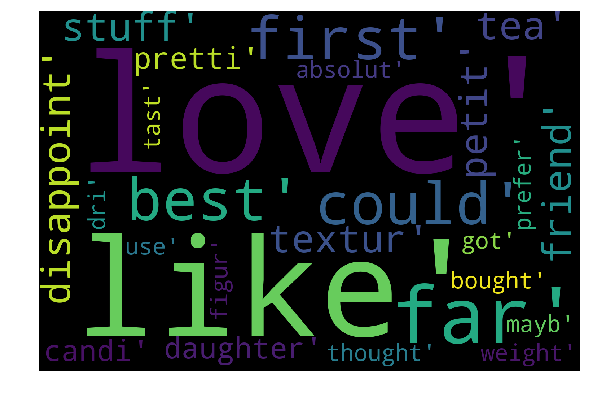

###########################################################################################################


In [40]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='black', 
                 
                min_font_size = 10).generate(str(cluster_2[:30])) 
  
# plot the WordCloud image 
print("###########################################################################################################")
print("WORDS FOR CLUSTER 2 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
print("###########################################################################################################")

# THIS CLUSTER REPRESENT WORDS RELATED TO PERSON ATTRIBUTES SUCH AS DAUGHTER,FRIEND,PRETTI,DISAPPOINT

# OBJECTIVE:
###  1.APPLY DBSCAN  CLUSTERING ON FINE FOOD REVIEWS DATASET 
 
###  2.FORMING CLUSTERS WITH TFIDF WORD2VEC VECTORIZATION
 
### 3 FINDING THE BEST EPS VALUE WITH ELBOW_METHOD 
 
### 4  GETTING THE WORDS IN THE CLUSTER AND REPRESENTING EACH CLUSTER WORDS

In [42]:
# Training my own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in data['CleanedText']:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=100,size=100,workers=2)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")
print("sample words ", w_t_c_words[0:20])

['savori', 'choic', 'concentr', 'excel', 'make', 'homemad', 'broth', 'ingredi', 'product', 'everi', 'bit', 'good', 'mine']
***********************************************************************
sample words  ['choic', 'excel', 'make', 'ingredi', 'product', 'everi', 'bit', 'good', 'bought', 'chip', 'littl', 'shop', 'wasnt', 'sure', 'expect', 'packag', 'first', 'bite', 'didnt', 'know']


In [43]:
###### NOW STARTING TFIDF WORD TO VEC FOR TRAIN DATA#################################################################
#NOW STARTING TF-IDF WEIGHTED WORD-TO-VEC
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(data['CleanedText'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
train_tfidf_sent_vectors =[]# the tfidf-w2v for each sentence/review is stored in this list

for sent in tqdm(list_of_sent): # for each review/sentence
  sent_vec = np.zeros(100) # as word vectors are of zero length
  weight_sum =0; # num of words with a valid vector in the sentence/review
  for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     tf_idf = dictionary[word]*(sent.count(word)/len(sent))# dictionary[word] = idf value of word in whole courpus
     sent_vec += (vec * tf_idf)# sent.count(word) = tf valeus of word in this review
     weight_sum += tf_idf 
  if weight_sum != 0:
   sent_vec /= weight_sum
   train_tfidf_sent_vectors.append(sent_vec)

100%|████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:04<00:00, 1280.11it/s]


In [44]:
from sklearn.preprocessing import StandardScaler #standarizing the training data
x_data=StandardScaler( with_mean=False).fit_transform(train_tfidf_sent_vectors)
print(x_data.shape)

(6000, 100)


# ELBOW METHOD TO FIND BEST VALUE OF EPS

In [45]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=100)
neigh.fit(x_data)
dist,ind= neigh.kneighbors(x_data)
listed_dis=[]
listed_dis =dist[: ,99].tolist()
listed_dis.sort()

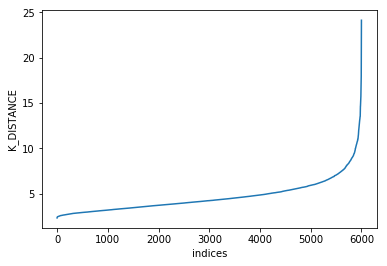

In [46]:
import matplotlib.pyplot as plt
plt.plot( np.arange(0,len(listed_dis)),listed_dis)
plt.ylabel('K_DISTANCE')
plt.xlabel('indices')
plt.show()

# BEST EPS FROM ABOVE GRAPH IS 5

In [47]:
# #############################################################################
# Compute DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=5, min_samples=100).fit(x_data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.

In [48]:
# here appending a new column clusters in our dataset to get cluster 
data['Cluster'] = labels
print(data.head())

       Score                                        CleanedText  Cluster
24645      1  savori choic concentr excel make homemad broth...        0
83326      1  bought chip littl sandwich shop sonoma vacat w...        0
29012      1  plocki tortilla chip red bean rice ounc bag pa...        0
51594      1     mix pleasant color flavor great dish call rice        0
54396      1  brother gave christma favorit gift becam confi...        0


In [51]:
np.unique(labels)

array([-1,  0], dtype=int64)

#  HERE WE GOT TWO CLUSTERS AS -1,0

In [53]:
# here we are appending words to each clusters through w_t_v_words
i=0;
cluster_1=[]
cluster_2=[]
for line in list_of_sent[:5999]:
    i=i+1;
    for each_word in line:
       for word in  w_t_c_words:
          if word==each_word:
            c=data['Cluster'][i:i+1].iloc[0]
            if c==0:
               cluster_1.append(word);
            if c==-1:
               cluster_2.append(word);
            break; 
       break; 
              

In [55]:
print("WORDS IN CLUSTER 1 ARE",len(cluster_1))
print("WORDS IN CLUSTER 2 ARE",len(cluster_2))


WORDS IN CLUSTER 1 ARE 4103
WORDS IN CLUSTER 2 ARE 346


# REPRESENTING WORDS USING WORDCLOUD  FOR BOTH CLUSTERS

##########################################################################################
WORDS FOR CLUSTER 1 ARE:::


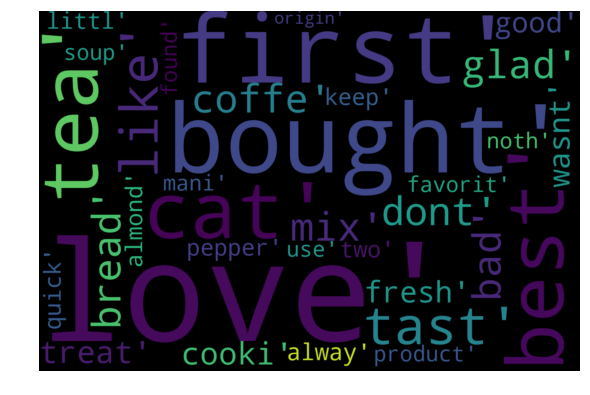

##########################################################################################


In [59]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='black', 
                 
                min_font_size = 10).generate(str(cluster_1[:50])) 
  
# plot the WordCloud image 
print("##########################################################################################")
print("WORDS FOR CLUSTER 1 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
print("##########################################################################################")


# CLUSTER 1 HAVE MAJORITY WORDS FOR ITEMS FEATURES AS BOUGHT,LOVE,PRODUCT

##########################################################################################
WORDS FOR CLUSTER 2 ARE:::


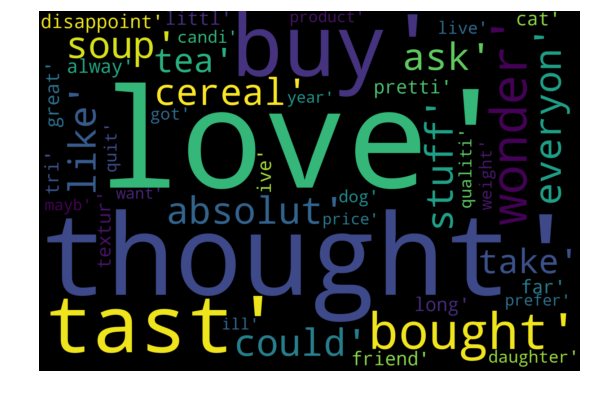

##########################################################################################


In [60]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='black', 
                 
                min_font_size = 10).generate(str(cluster_2[:50])) 
  
# plot the WordCloud image 
print("##########################################################################################")
print("WORDS FOR CLUSTER 2 ARE:::")
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 
print("##########################################################################################")

#  CLUSTER 2 REPRESENT WORDS RELATED TO PERSON ATTRIBUTES AS DAUGHTER,FRIENDS,PREFER,LOVE,LONG

### CLUSTERING ASSIGNMENT IS COMPLETED FOR ALL THREE CLUSTERING ALGORITHMS 

In [64]:
print("##########################     COMPLETED    ###################################################3")

##########################     COMPLETED    ###################################################3
